In [1348]:
##Required Libraries
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing, linear_model, model_selection
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from plotchecker import LinePlotChecker, ScatterPlotChecker, BarPlotChecker
from urllib.request import urlopen
import matplotlib
import pandas as pd
import urllib.request
from urllib.parse import urlparse
from bs4 import BeautifulSoup
import numpy as np
import scipy as sc
import csv
import matplotcheck.base as mpc 
import matplotcheck.notebook as nb 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.decomposition import PCA
from datetime import datetime, timedelta
%matplotlib inline


import requests
import urllib
import json
import os
import time
import math


In [946]:
base_url = "https://www.oref.org.il//Shared/Ajax/GetAlarmsHistory.aspx?lang=he&fromDate={}&toDate={}&mode=0"
start_date = datetime(2014, 7, 16)  # Updated start date
end_date = datetime(2023, 1, 1)

final_df = pd.DataFrame()
print('ok')

ok


In [947]:
final_df = pd.DataFrame()

while start_date < end_date:
    from_date = start_date.strftime("%d.%m.%Y")
    to_date = (start_date + timedelta(days=15)).strftime("%d.%m.%Y")
    url = base_url.format(from_date, to_date)
    response = requests.get(url)
    x = response.json()
    df = pd.DataFrame(x)
    final_df = pd.concat([final_df, df], ignore_index=True)

    start_date += timedelta(days=15)


                                                  data        date      time  \
0                                         עוטף עזה 223  31.07.2014  22:17:50   
1                                           אשקלון 250  31.07.2014  21:29:21   
2                             אשקלון 250, עוטף עזה 217  31.07.2014  21:29:17   
3                 אשקלון 246, אשקלון 250, עוטף עזה 217  31.07.2014  21:29:05   
4     אשקלון 246, אשקלון 247, אשקלון 250, עוטף עזה 217  31.07.2014  21:29:04   
...                                                ...         ...       ...   
9204                                        עין השלושה  03.11.2022  21:10:28   
9205                                           כיסופים  03.11.2022  21:10:28   
9206                                             עלמון  29.12.2022  20:19:52   
9207                                             עלמון  29.12.2022  19:37:42   
9208                                          נופי פרת  13.01.2023  23:30:41   

                alertDate  category    

In [948]:
start_date = datetime(2021, 5, 10)  # Updated start date
end_date = datetime(2021, 5, 16)  # Updated end date

while start_date <= end_date:
    from_date = start_date.strftime("%d.%m.%Y")
    to_date = start_date.strftime("%d.%m.%Y")  # Use the same date as the start date for the to_date parameter
    url = base_url.format(from_date, to_date)
    response = requests.get(url)
    x = response.json()
    df = pd.DataFrame(x)
    final_df = pd.concat([final_df, df], ignore_index=True)

    start_date += timedelta(days=1)  # Use a date span of 1 day

                                                   data        date      time  \
0                                          עוטף עזה 223  31.07.2014  22:17:50   
1                                            אשקלון 250  31.07.2014  21:29:21   
2                              אשקלון 250, עוטף עזה 217  31.07.2014  21:29:17   
3                  אשקלון 246, אשקלון 250, עוטף עזה 217  31.07.2014  21:29:05   
4      אשקלון 246, אשקלון 247, אשקלון 250, עוטף עזה 217  31.07.2014  21:29:04   
...                                                 ...         ...       ...   
14814                               תל אביב - מרכז העיר  16.05.2021  00:09:05   
14815                                           מבקיעים  16.05.2021  00:09:05   
14816                                             כרמיה  16.05.2021  00:09:05   
14817                         אזור תעשייה הדרומי אשקלון  16.05.2021  00:09:05   
14818                                            אשקלון  16.05.2021  00:09:05   

                 alertDate 

In [1360]:
print(final_df)

                                                   data        date      time  \
0                                          עוטף עזה 223  31.07.2014  22:17:50   
1                                            אשקלון 250  31.07.2014  21:29:21   
2                              אשקלון 250, עוטף עזה 217  31.07.2014  21:29:17   
3                  אשקלון 246, אשקלון 250, עוטף עזה 217  31.07.2014  21:29:05   
4      אשקלון 246, אשקלון 247, אשקלון 250, עוטף עזה 217  31.07.2014  21:29:04   
...                                                 ...         ...       ...   
14814                               תל אביב - מרכז העיר  16.05.2021  00:09:05   
14815                                           מבקיעים  16.05.2021  00:09:05   
14816                                             כרמיה  16.05.2021  00:09:05   
14817                         אזור תעשייה הדרומי אשקלון  16.05.2021  00:09:05   
14818                                            אשקלון  16.05.2021  00:09:05   

                 alertDate 

In [1340]:
##converting the data to CSV while extracting related
## information from columns and make new columns

df=final_df.copy()
df = df.drop_duplicates(subset='rid')
df = df.sort_values('rid')
df = df.rename(columns={'data': 'city'})
df['hour'] = pd.to_datetime(df['time']).dt.hour
df['month'] = pd.to_datetime(df['date'], format='%d.%m.%Y').dt.month
df['year'] = pd.to_datetime(df['date'], format='%d.%m.%Y').dt.year
df['day'] = pd.to_datetime(df['date'], format='%d.%m.%Y').dt.strftime('%A')

downloads_folder = os.path.expanduser("~/Downloads")
csv_file = os.path.join(downloads_folder, 'Checking1.csv')
df.to_csv(csv_file, index=False, encoding='utf-8-sig')
print(f"CSV file 'output.csv' has been created.")

CSV file 'output.csv' has been created.


In [1341]:
def select_rows_by_cell_val(df, col_name, matching_val):
    return df[df[col_name] == matching_val]

In [1342]:
def select_rows_w_vals_in_range(dataframe, col_name, lower_range, higher_range):
    return dataframe[dataframe[col_name].between(lower_range, higher_range)]

In [1343]:
def get_frequent_elements(df, col_name, num_top_elements):
    updated_df = df.copy()
    return (updated_df[col_name].value_counts()[:num_top_elements].sort_index(ascending=True))

In [1344]:
## Working now on EDA & Visualization
updated_df = df.copy()
print(updated_df.columns.tolist())

['city', 'date', 'time', 'alertDate', 'category', 'category_desc', 'matrix_id', 'rid', 'hour', 'month', 'year', 'day']


In [1345]:

print(updated_df.columns.tolist())
columns_to_remove = ['category', 'category_desc', 'matrix_id', 'rid']
updated_df.drop(columns=columns_to_remove, inplace=True)
print(updated_df.columns.tolist())

['city', 'date', 'time', 'alertDate', 'category', 'category_desc', 'matrix_id', 'rid', 'hour', 'month', 'year', 'day']
['city', 'date', 'time', 'alertDate', 'hour', 'month', 'year', 'day']


In [1305]:
print('Check for missing values:')
missing_values = updated_df.isnull().sum()

Check for missing values:
city         0
date         0
time         0
alertDate    0
hour         0
month        0
year         0
day          0
dtype: int64


In [1346]:
print('Head of file')
print(updated_df.head())
print('Info')
print(updated_df.info())
print('Describe')
print(updated_df.describe())

Head of file
                                                  city        date      time  \
346              באר שבע 288, באר שבע 289, באר שבע 291  24.07.2014  17:05:26   
345  באר שבע 288, אשקלון 256, באר שבע 289, באר שבע 291  24.07.2014  17:05:35   
344               אשקלון 256, באר שבע 289, באר שבע 291  24.07.2014  17:05:59   
343                           באר שבע 289, באר שבע 291  24.07.2014  17:06:02   
342              באר שבע 288, באר שבע 289, באר שבע 291  24.07.2014  17:06:08   

               alertDate  hour  month  year       day  
346  2014-07-24T17:05:00    17      7  2014  Thursday  
345  2014-07-24T17:06:00    17      7  2014  Thursday  
344  2014-07-24T17:06:00    17      7  2014  Thursday  
343  2014-07-24T17:06:00    17      7  2014  Thursday  
342  2014-07-24T17:06:00    17      7  2014  Thursday  
Info
<class 'pandas.core.frame.DataFrame'>
Int64Index: 13756 entries, 346 to 9208
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     -

In [1307]:

print('Explore the distribution of bombing incidents across different cities:')
city_counts = updated_df['city'].value_counts()
print(city_counts)
print('Analyze the frequency of bombing incidents by hour:')
hour_counts = updated_df['hour'].value_counts().sort_index()
print(hour_counts)
print('Analyze the frequency of bombing incidents by month:')
month_counts = updated_df['month'].value_counts().sort_index()
print(month_counts)
print('Analyze the frequency of bombing incidents by day of the week:')
day_counts = updated_df['day'].value_counts().sort_index()
print(day_counts)


Explore the distribution of bombing incidents across different cities:
עוטף עזה 224                                              299
נתיב העשרה                                                248
אזור תעשייה הדרומי אשקלון                                 247
עוטף עזה 218                                              241
נחל עוז                                                   217
                                                         ... 
עוטף עזה 218, עוטף עזה 219, עוטף עזה 218, עוטף עזה 219      1
עוטף עזה 218, עוטף עזה 223                                  1
עוטף עזה 218, עוטף עזה 223, עוטף עזה 224                    1
עוטף עזה 218, עוטף עזה 223, עוטף עזה 224, עוטף עזה 219      1
נופי פרת                                                    1
Name: city, Length: 1457, dtype: int64
Analyze the frequency of bombing incidents by hour:
0     574
1     583
2     585
3     502
4     179
5     314
6     234
7     301
8     266
9     238
10    670
11    558
12    421
13    901
14    814
15    

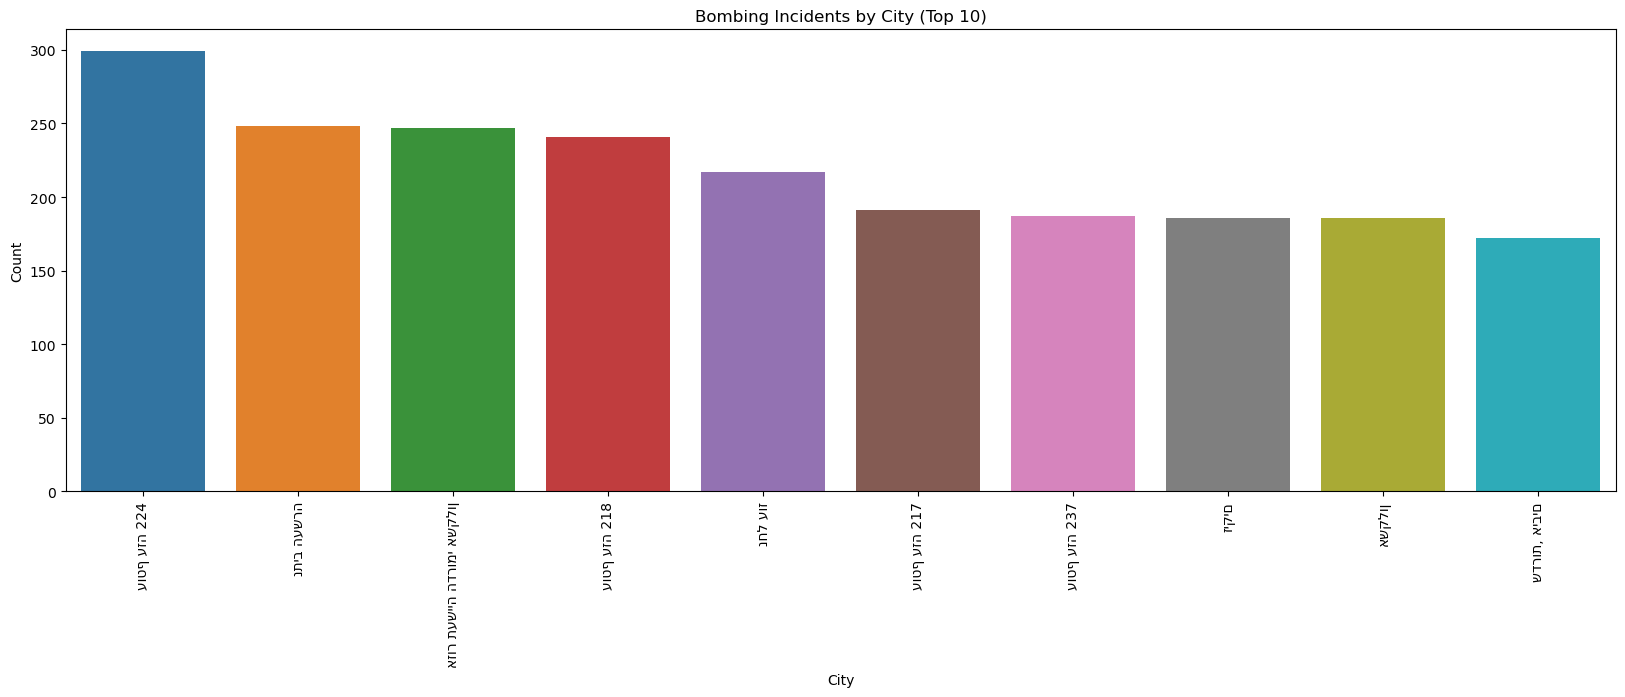

In [1369]:
plt.figure(figsize=(20, 6))
sns.countplot(x='city', data=updated_df, order=updated_df['city'].value_counts().head(10).index)
plt.xticks(rotation=90)
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Bombing Incidents by City (Top 10)')
plt.show()

Bar plot of bombing incidents by hour:


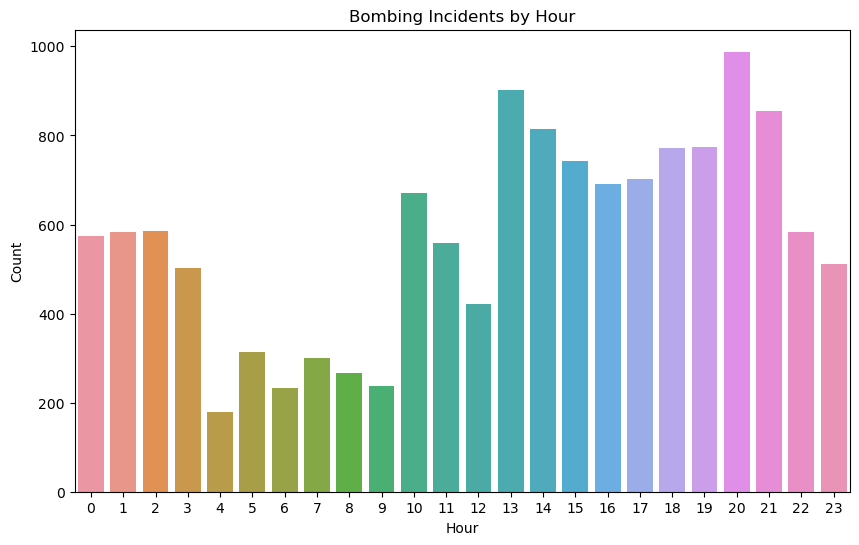

In [1309]:
print('Bar plot of bombing incidents by hour:')

plt.figure(figsize=(10, 6))
sns.countplot(x='hour', data=updated_df)
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Bombing Incidents by Hour')
plt.show()

Bar plot of bombing incidents by month:


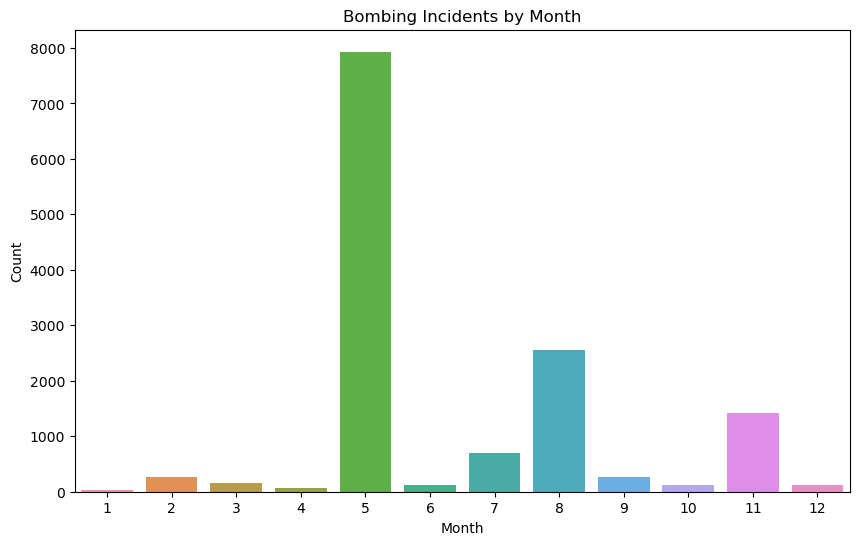

In [1310]:
print('Bar plot of bombing incidents by month:')
plt.figure(figsize=(10, 6))
sns.countplot(x='month', data=updated_df)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Bombing Incidents by Month')
plt.show()

Bar plot of bombing incidents by day of the week:


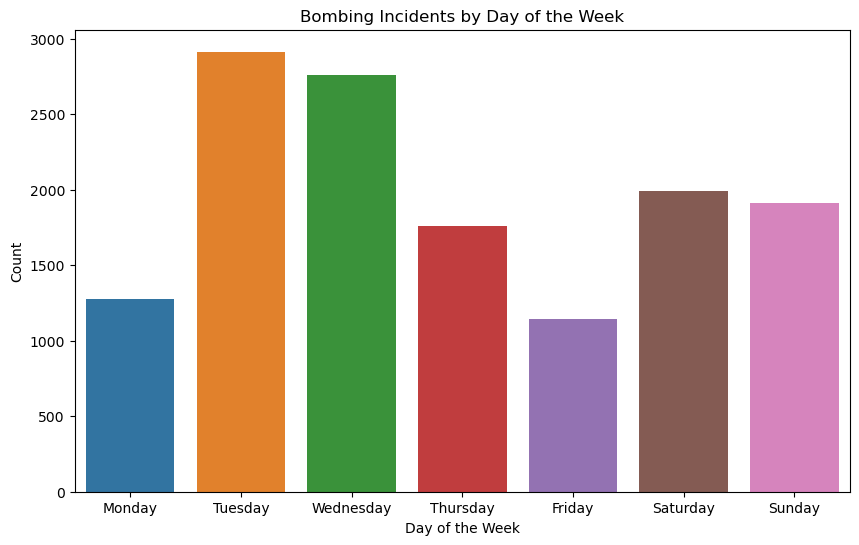

In [1311]:
print('Bar plot of bombing incidents by day of the week:')
plt.figure(figsize=(10, 6))
sns.countplot(x='day', data=updated_df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.title('Bombing Incidents by Day of the Week')
plt.show()

In [1312]:
features = ['city', 'hour']

In [1313]:
# Encode categorical features if any
new_df=updated_df.copy()
encoder = LabelEncoder()
new_df['city'] = encoder.fit_transform(new_df['city'])
new_df['hour'] = encoder.fit_transform(new_df['hour'])

In [1314]:
# Perform K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
new_df['Cluster'] = kmeans.fit_predict(new_df[features])

In [1315]:
# Get the most frequent cluster
most_frequent_cluster = new_df['Cluster'].mode().values[0]


In [1316]:
# Filter the dataframe for the most frequent cluster
most_frequent_cluster_df = new_df[new_df['Cluster'] == most_frequent_cluster]

In [1317]:
# Count the occurrences of each hour in the most frequent cluster
hour_counts = most_frequent_cluster_df['hour'].value_counts()

In [1318]:
# Get the 5 most common hours
most_common_hours = hour_counts.nlargest(5).index.tolist()

print("5 most common hours in the most frequent cluster:", most_common_hours)

5 most common hours in the most frequent cluster: [18, 16, 17, 19, 14]


In [1319]:
# Assuming you have a dataframe 'new_df' with 'hour' and 'date' columns

# Convert date column to datetime format
new_df['date'] = pd.to_datetime(new_df['date'], format='%d.%m.%Y')

In [1320]:
# Extract day of the week from date
new_df['day_of_week'] = new_df['date'].dt.dayofweek

In [1321]:
# Select the features for clustering
features = ['hour', 'day_of_week']

In [1322]:
# Perform K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
new_df['Cluster'] = kmeans.fit_predict(new_df[features])

In [1323]:
# Get the most frequent cluster for each day of the week
most_common_hours = {}

In [1324]:
for day in range(7):
    # Filter the dataframe for the current day of the week
    day_df = new_df[new_df['day_of_week'] == day]

    # Count the occurrences of each hour in the current day
    hour_counts = day_df['hour'].value_counts()

    # Get the most common hour
    most_common_hour = hour_counts.idxmax()

    # Store the most common hour for the current day
    most_common_hours[day] = most_common_hour


In [1325]:
weekday_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

for day, hour in most_common_hours.items():
    print(f"Most common hour on {weekday_names[day]}: {hour}")

Most common hour on Monday: 16
Most common hour on Tuesday: 20
Most common hour on Wednesday: 3
Most common hour on Thursday: 1
Most common hour on Friday: 1
Most common hour on Saturday: 13
Most common hour on Sunday: 0


In [1326]:

# Convert date column to datetime format
new_df['date'] = pd.to_datetime(new_df['date'], format='%d.%m.%Y')

# Extract day of the week from date
new_df['day_of_week'] = new_df['date'].dt.dayofweek

# Select the features for clustering
features = ['hour', 'day_of_week']

# Perform K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
new_df['Cluster'] = kmeans.fit_predict(new_df[features])


In [1327]:

# Get the most frequent cluster for the weekend and weekdays
weekend_cluster = new_df[new_df['day_of_week'].isin([4, 5])]['Cluster'].mode().values[0]
weekday_cluster = new_df[~new_df['day_of_week'].isin([4, 5])]['Cluster'].mode().values[0]

# Filter the weekend cluster
weekend_df = new_df[new_df['Cluster'] == weekend_cluster]

# Filter the weekday cluster
weekday_df = new_df[new_df['Cluster'] == weekday_cluster]

# Count the occurrences of each hour in the weekend cluster
weekend_hour_counts = weekend_df['hour'].value_counts()

# Count the occurrences of each hour in the weekday cluster
weekday_hour_counts = weekday_df['hour'].value_counts()

# Get the most common hour for the weekend
most_common_weekend_hour = weekend_hour_counts.idxmax()

# Get the most common hour for the weekday
most_common_weekday_hour = weekday_hour_counts.idxmax()

print("Most common hour on the weekend:", most_common_weekend_hour)
print("Most common hour on weekdays:", most_common_weekday_hour)

Most common hour on the weekend: 18
Most common hour on weekdays: 13


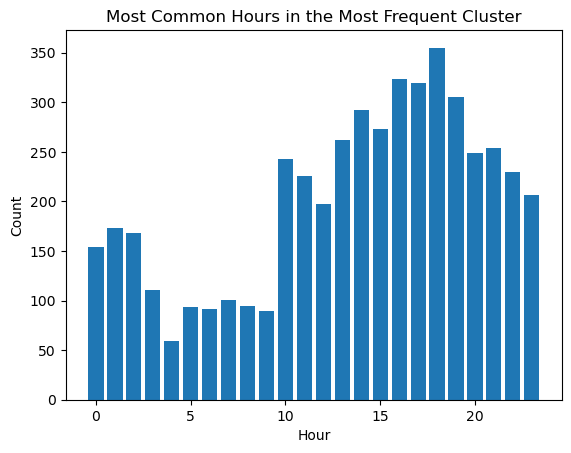

In [1328]:
# Count the occurrences of each hour in the most frequent cluster
## Bar Plot - Most Common Hours in the Most Frequent Cluster:
hour_counts = most_frequent_cluster_df['hour'].value_counts()

# Plotting the most common hours
plt.bar(hour_counts.index, hour_counts.values)
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Most Common Hours in the Most Frequent Cluster')
plt.show()


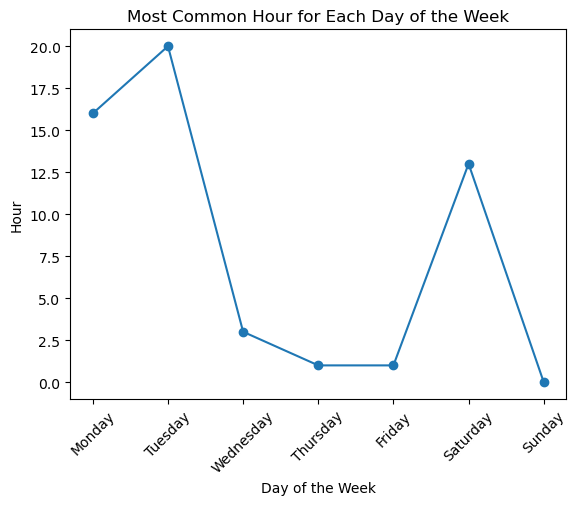

In [1329]:
# Convert the most common hours dictionary to a dataframe
#Line Plot - Most Common Hour for Each Day of the Week:
common_hours_df = pd.DataFrame(list(most_common_hours.items()), columns=['Day', 'Hour'])

# Sort the dataframe by day
common_hours_df = common_hours_df.sort_values('Day')

# Plotting the most common hour for each day of the week
plt.plot(common_hours_df['Day'], common_hours_df['Hour'], marker='o')
plt.xticks(range(7), weekday_names, rotation=45)
plt.xlabel('Day of the Week')
plt.ylabel('Hour')
plt.title('Most Common Hour for Each Day of the Week')
plt.show()

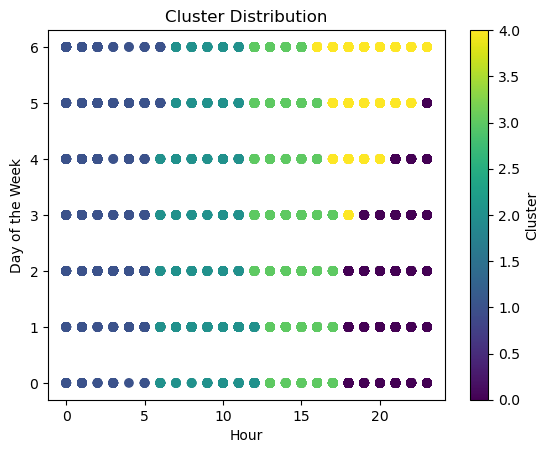

In [1330]:
# Convert date column to datetime format
new_df['date'] = pd.to_datetime(new_df['date'], format='%d.%m.%Y')

# Extract day of the week from date
new_df['day_of_week'] = new_df['date'].dt.dayofweek

# Select the features for clustering
features = ['hour', 'day_of_week']

# Perform K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
new_df['Cluster'] = kmeans.fit_predict(new_df[features])

# Create a scatter plot
plt.scatter(new_df['hour'], new_df['day_of_week'], c=new_df['Cluster'], cmap='viridis')
plt.xlabel('Hour')
plt.ylabel('Day of the Week')
plt.title('Cluster Distribution')
plt.colorbar(label='Cluster')
plt.show()


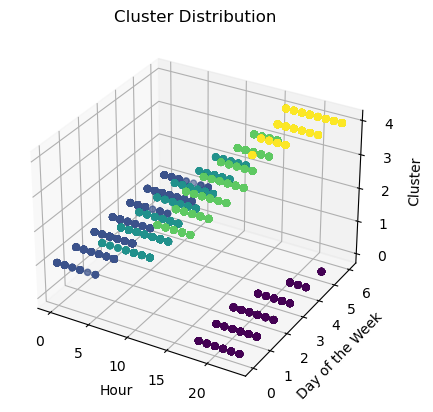

In [1331]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming you have a dataframe 'new_df' with 'hour', 'day_of_week', and 'Cluster' columns

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(new_df['hour'], new_df['day_of_week'], new_df['Cluster'], c=new_df['Cluster'], cmap='viridis')

# Set labels for each axis
ax.set_xlabel('Hour')
ax.set_ylabel('Day of the Week')
ax.set_zlabel('Cluster')

# Set title for the plot
ax.set_title('Cluster Distribution')

# Show the plot
plt.show()


In [1362]:
df=updated_df.copy()

In [1364]:
# Select the features for clustering
features = ['hour']

# Perform K-Means clustering
kmeans = KMeans(n_clusters=len(df['city'].unique()), random_state=42)
df['Cluster'] = kmeans.fit_predict(df[features])

# Group by city and calculate the most common hour for each city
city_hour_counts = df.groupby('city')['hour'].apply(lambda x: x.value_counts().index[0])


D:\Softwares\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (24) found smaller than n_clusters (1457). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


In [1365]:
# Create a DataFrame to store the results
result_df = pd.DataFrame(columns=['City', 'Top Hour'])

# Iterate over all cities and store the most common hour for each city
for city in df['city'].unique():
    top_hour = city_hour_counts[city]
    result_df = result_df.append({'City': city, 'Top Hour': top_hour}, ignore_index=True)

# Set the path for the CSV file in the Downloads folder
downloads_folder = os.path.expanduser("~/Downloads")
csv_file = os.path.join(downloads_folder, 'city_top_hour.csv')

# Save the results to a CSV file
result_df.to_csv(csv_file, index=False, encoding='utf-8-sig')

C:\Users\Adira\AppData\Local\Temp\ipykernel_4600\712334950.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'City': city, 'Top Hour': top_hour}, ignore_index=True)
C:\Users\Adira\AppData\Local\Temp\ipykernel_4600\712334950.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'City': city, 'Top Hour': top_hour}, ignore_index=True)
C:\Users\Adira\AppData\Local\Temp\ipykernel_4600\712334950.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'City': city, 'Top Hour': top_hour}, ignore_index=True)
C:\Users\Adira\AppData\Local\Temp\ipykernel_4600\712334950.py:7: FutureWarning: The frame.append method is deprecated and will be removed from

In [1367]:
# Iterate over all cities and print the most common hour for each city
for city in df['city'].unique():
    top_hour = city_hour_counts[city]
    print("City:", city)
    print("Top Hour:", top_hour)
    print('___')

City: באר שבע 288, באר שבע 289, באר שבע 291
Top Hour: 17
___
City: באר שבע 288, אשקלון 256, באר שבע 289, באר שבע 291
Top Hour: 17
___
City: אשקלון 256, באר שבע 289, באר שבע 291
Top Hour: 17
___
City: באר שבע 289, באר שבע 291
Top Hour: 17
___
City: באר שבע 288, באר שבע 291
Top Hour: 17
___
City: באר שבע 288
Top Hour: 17
___
City: באר שבע 288, באר שבע 289
Top Hour: 17
___
City: באר שבע 289
Top Hour: 17
___
City: עוטף עזה 230
Top Hour: 14
___
City: עוטף עזה 237
Top Hour: 10
___
City: עוטף עזה 218
Top Hour: 13
___
City: עוטף עזה 218, עוטף עזה 217
Top Hour: 19
___
City: עוטף עזה 217
Top Hour: 15
___
City: עוטף עזה 224
Top Hour: 16
___
City: אשקלון 250, אשקלון 251, עוטף עזה 251, אשקלון 249
Top Hour: 16
___
City: אשקלון 250, אשקלון 251, עוטף עזה 251, אשקלון 249, אשדוד 282
Top Hour: 16
___
City: אשדוד 281, אשקלון 250, אשקלון 251, עוטף עזה 251, אשקלון 249, אשדוד 280, אשדוד 282
Top Hour: 16
___
City: אשדוד 281, אשדוד 280, אשדוד 282, אשקלון 249
Top Hour: 16
___
City: אשדוד 282, אשקלון 249
Top Hou